В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [230]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [163]:
cars_df = pd.read_csv('C:/Users/dcmaterik_1/Documents/ML_for_people/Data/Lesson 4 Linear regression final project/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [164]:
cars_df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [165]:
report_data = {'Type':[], 'Unique elements':[], 'Unique values':[], 'Column':[]}
for column in cars_df.select_dtypes('object').columns:
    report_data['Column'].append(column)
    report_data['Type'].append(type(column[0]))
    report_data['Unique elements'].append(cars_df[column].nunique())    
    report_data['Unique values'].append(cars_df[column].unique()) 
df = pd.DataFrame(report_data)
df = df.set_index('Column')
df

,Type,Unique elements,Unique values
Column,,,
Brand,<class 'str'>,11,"[Toyota, Honda, Ford, Maruti, Hyundai, Tata, M..."
Model,<class 'str'>,58,"[Corolla, Civic, Mustang, Swift, Sonata, Nexon..."
Fuel_Type,<class 'str'>,2,"[Petrol, Diesel]"
Transmission,<class 'str'>,2,"[Manual, Automatic]"
Owner_Type,<class 'str'>,3,"[First, Second, Third]"


In [166]:
df.iloc[0]['Unique values']

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [167]:
df.iloc[1]['Unique values']

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

**Спостереження**
В наборі даних 7 числових (без урахування колонки id - Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price) і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення) - Fuel_Type і Transmission
- 2 мультикатегоріальних - Brand і Model
- 1 колонка з відношенням порядку - Owner_Type

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [169]:
inputs, targets = cars_df.drop(columns='Price'), cars_df['Price']

In [72]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

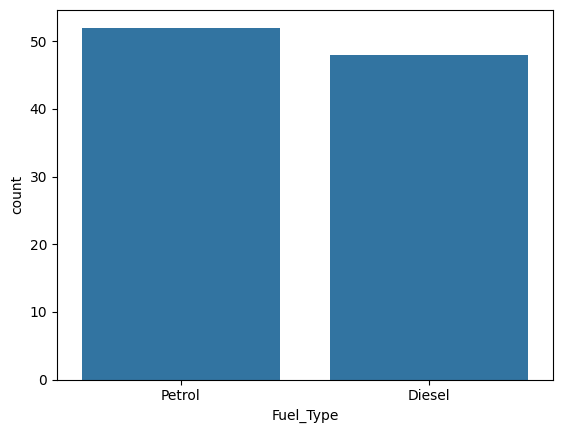

In [171]:
sns.countplot(data=cars_df, x='Fuel_Type');

In [172]:
cars_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [173]:
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_code'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_code'] = X_test.Fuel_Type.map(Fuel_Type_codes)

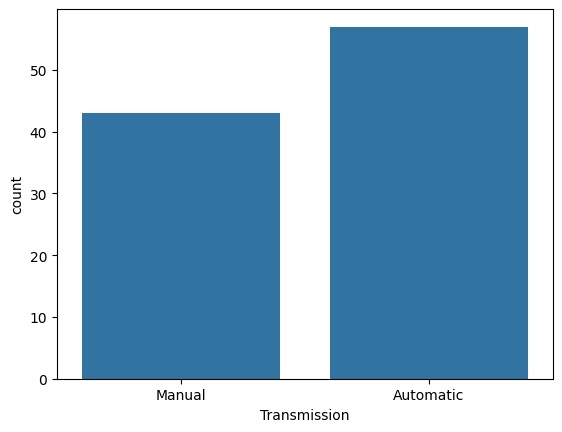

In [176]:
sns.countplot(data=cars_df, x='Transmission');

In [177]:
Transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission_code'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_code'] = X_test.Transmission.map(Transmission_codes)

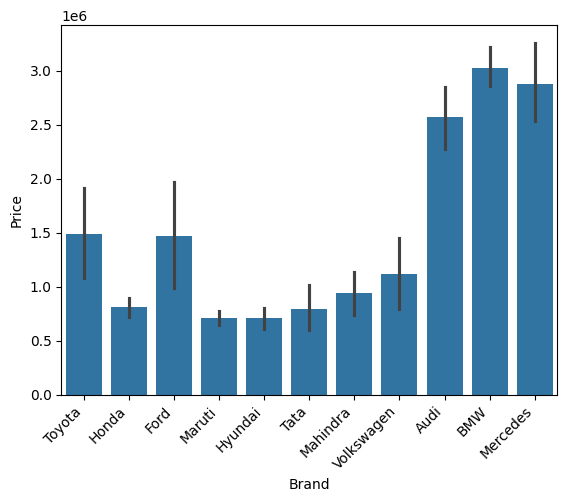

In [128]:
sns.barplot(data=cars_df, x='Brand', y='Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [180]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [199]:
one_hot = enc.transform(X_test[['Brand']]).toarray()

In [182]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [184]:
X_test[enc.categories_[0]] = one_hot

In [193]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()

In [194]:
X_train[enc.categories_[0]] = one_hot_train

In [206]:
Model_Types = {'Corolla': 'Sedan', 'Civic':'Sedan', 'Mustang':'Sedan', 'Swift':'Hatchback', 'Sonata':'Sedan', 'Nexon': 'Crossover',
       'Scorpio':'Crossover', 'Polo':'Sedan', 'A4':'Sedan', 'X1':'Crossover', 'C-Class':'Sedan', 'Endeavour':'Crossover','Creta':'Crossover',
       'Harrier':'Crossover', 'Ertiga':'Hatchback', 'City':'Sedan', 'Tiguan':'Crossover', 'Q3':'Crossover', '5 Series':'Sedan', 'GLC':'Crossover',
       'Innova':'Crossover', 'Figo':'Hatchback', 'Verna':'Sedan', 'Altroz':'Hatchback', 'Thar':'Crossover', 'Passat':'Sedan', 'A6':'Sedan', 'X3':'Crossover',
       'E-Class': 'Sedan', 'Fortuner':'Crossover', 'Aspire':'Sedan', 'Elantra':'Sedan', 'Safari':'Crossover', 'Vitara':'Crossover',
       'WR-V':'Crossover', 'Ameo':'Sedan', 'A3':'Sedan', '7 Series':'Sedan', 'GLE':'Crossover', 'Yaris':'Hatchback', 'Ranger':'Crossover',
       'Santro':'Hatchback', 'Tigor':'Hatchback', 'S-Cross':'Crossover', 'BR-V':'Crossover', 'T-Roc':'Crossover', 'Q7':'Crossover', 'X5':'Crossover', 'GLA':'Crossover',
       'Camry':'Sedan', 'Venue':'Crossover', 'Tiago':'Hatchback', 'XUV300':'Crossover', 'Vento':'Sedan', 'A5':'Sedan', '3 Series':'Sedan',
       'Innova Crysta':'Crossover', 'EcoSport':'Crossover'}
X_train['Model_Type'] = X_train.Model.map(Model_Types)
X_test['Model_Type'] = X_test.Model.map(Model_Types)

In [207]:
enc_models = preprocessing.OneHotEncoder()
enc_models.fit(X_train[['Model_Type']])
enc_models.categories_

[array(['Crossover', 'Hatchback', 'Sedan'], dtype=object)]

In [208]:
one_hot_models = enc_models.transform(X_test[['Model_Type']]).toarray()

In [209]:
X_test[enc_models.categories_[0]] = one_hot_models

In [211]:
one_hot_train_models = enc_models.transform(X_train[['Model_Type']]).toarray()
X_train[enc_models.categories_[0]] = one_hot_train_models

In [213]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [214]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Model_Type,Crossover,Hatchback,Sedan,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Crossover,1.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,1.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,1.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sedan,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Crossover,1.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Model_Type,Crossover,Hatchback,Sedan,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Crossover,1.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Hatchback,0.0,1.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sedan,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Hatchback,0.0,1.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,1.0,2.0


(None, None)

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [216]:
X_train_numbes_only = X_train.select_dtypes(include='number')

In [217]:
new_df = pd.concat([X_train_numbes_only, y_train], axis = 1)

In [219]:
new_df.corr()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Crossover,Hatchback,Sedan,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,1.135001e-02,0.020129,0.002650,1.128188e-01,-0.078476,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-2.193460e-01,0.018255,-0.076335,3.836113e-01,-0.180398,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,3.685195e-01,-0.137675,0.080895,-1.468442e-01,0.016719,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-2.015653e-01,0.085114,-0.230158,4.806551e-01,-0.089800,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,2.348887e-01,-0.165115,0.170139,-4.137204e-01,0.105620,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-4.047778e-02,-0.148437,0.001897,-3.991515e-01,0.266230,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,3.485347e-01,-0.094002,0.428725,-1.147358e-01,-0.357138,-0.043849,0.000979
Fuel_Type_code,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-8.335939e-03,0.125010,-0.198747,1.417810e-01,0.106044,0.281122,-0.110782
Transmission_code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-7.697370e-02,0.155500,-0.188475,-4.751910e-01,0.510125,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-1.111111e-01,-0.103221,-0.142067,-1.259882e-01,0.228527,-0.203925,0.328858


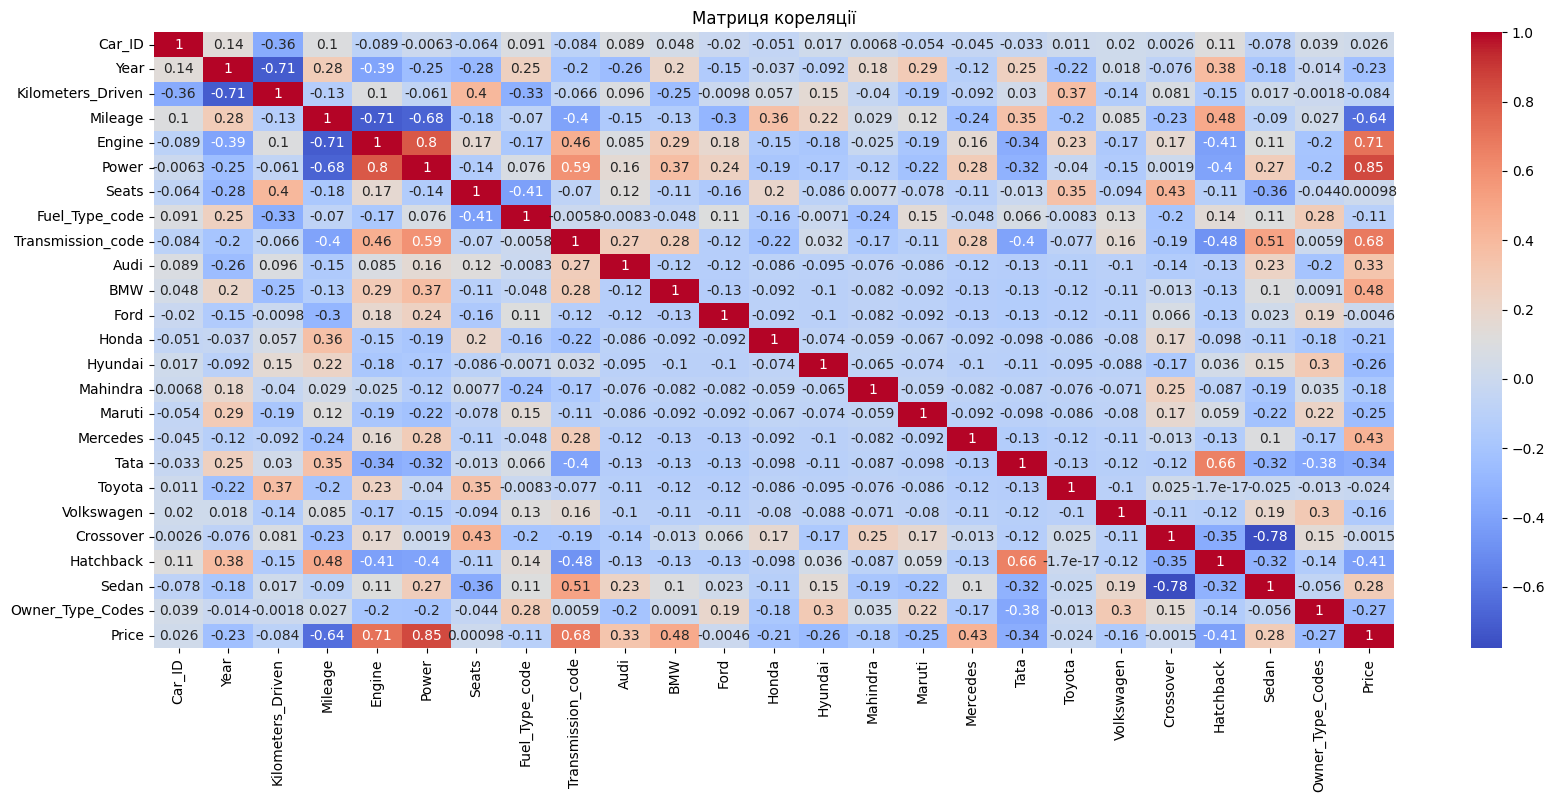

In [220]:
plt.figure(figsize=(20, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

**Спостереження**
Колонки 'Mileage', 'Engine', 'Power','Transmission_code' корелюють з цільовою змінною на більш ніж 0.5 за модулем.
Також достатньо сильно корелюють колонки BMW, Mercedes та Hatchbak (0.48, 0.43 та -0.41 відповідно)

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [222]:
X_train = X_train.select_dtypes(include='number')

In [226]:
X_test = X_test.select_dtypes(include='number')

In [231]:
model = LinearRegression().fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

loss_test = mean_squared_error(y_test, predictions_test, squared=False)
print('Test Loss:', loss_test)

loss_train = mean_squared_error(y_train, predictions_train, squared=False)
print('Train Loss:', loss_train)

Test Loss: 264089.8514854352
Train Loss: 208053.28289747675


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Передбачені значення')

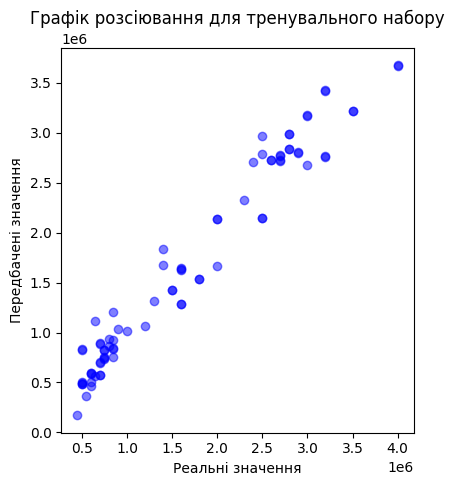

In [237]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, color='blue', alpha=0.5)
plt.title('Графік розсіювання для тренувального набору')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')

Text(0, 0.5, 'Передбачені значення')

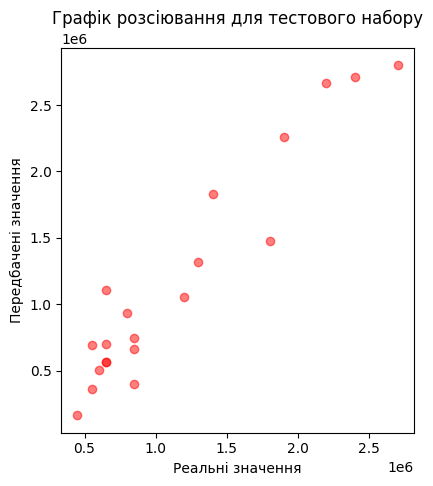

In [238]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_test, color='red', alpha=0.5)
plt.title('Графік розсіювання для тестового набору')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')

**Спостереження**
На тренувальному наборі модель поводить себе досить непогано і по графіку можна помітити, що дані майже вишиковуються в лінію x=y,
на тестовому наборі модель показала себе трішки гірше. В цілому мені здається, що модель поводить себе досить непогано

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [274]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Crossover', 'Hatchback', 'Sedan', 'Owner_Type_Codes'],
      dtype='object')

In [239]:
from sklearn.preprocessing import StandardScaler

In [275]:
scaler = StandardScaler()

numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [276]:
X_train_scaled = scaler.transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

In [286]:
cat_cols = ['Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Crossover', 'Hatchback', 'Sedan', 'Owner_Type_Codes']
categorical_data_train = X_train[cat_cols].values
X_train_scaled_all = np.concatenate((X_train_scaled, categorical_data_train), axis=1)

categorical_data_test = X_test[cat_cols].values
X_test_scaled_all = np.concatenate((X_test_scaled, categorical_data_test), axis=1)

In [287]:
model = LinearRegression().fit(X_train_scaled_all, y_train)

predictions_train = model.predict(X_train_scaled_all)
predictions_test = model.predict(X_test_scaled_all)

loss_test = mean_squared_error(y_test, predictions_test, squared=False)
print('Test Loss:', loss_test)

loss_train = mean_squared_error(y_train, predictions_train, squared=False)
print('Train Loss:', loss_train)

Test Loss: 265097.607274472
Train Loss: 208074.1404004187


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [289]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
23,1,1.584196e+06
8,Audi,7.853684e+05
15,Mercedes,7.433162e+05
9,BMW,7.405667e+05
4,Power,4.922027e+05
7,Transmission_code,2.643166e+05
17,Toyota,1.497932e+05
19,Crossover,5.450417e+04
22,Owner_Type_Codes,4.191780e+04
0,Year,-1.367694e+03


**Спостереження**
Найвпливовішими є колонки Audi, Mercedes та BMW. Вважаю вплив цих колонок цілком логічним, адже це дорогі марки авто, бренди високого сегменту, якісні та потужні машини, що значно впливає на вартість автомобіля.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [290]:
X = pd.DataFrame(X_train_scaled_all, columns=numeric_cols + cat_cols)
X = sm.add_constant(X)

In [292]:
import statsmodels.api as sm

Y = y_train

model = sm.OLS(Y.values,X)
results = model.fit()

In [293]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     65.43
Date:                Thu, 30 May 2024   Prob (F-statistic):           9.21e-33
Time:                        01:34:39   Log-Likelihood:                -1093.2
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      58   BIC:                             2283.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.112e+06   5.72e+0

**Спостереження**
Колонки Power, Fuel_Type_code, Transmission_code, Audi, BMW, Hyundai, Mahindra, Maruti, Mercedes, Toyota, Crossover, Hatchback, Sedan є стат. значущими       

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [304]:
X = X[['Power', 'Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti',
'Mercedes', 'Toyota', 'Crossover', 'Hatchback', 'Sedan']]
X = sm.add_constant(X)

In [305]:
model = sm.OLS(Y.values,X)
results = model.fit()

In [309]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     113.0
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.48e-39
Time:                        01:45:14   Log-Likelihood:                -1099.2
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      67   BIC:                             2255.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.646e+05   5.38e+0

**Спостереження**
R2 і Adj. R-squared змінились незначно, на 0.006 і 0.001

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [315]:
X = pd.DataFrame(X_train_scaled_all, columns=numeric_cols + cat_cols)
X = X[['Power', 'Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti',
'Mercedes', 'Toyota', 'Crossover', 'Hatchback', 'Sedan', 'Kilometers_Driven', 'Mileage', 'Ford', 'Volkswagen']]
X = sm.add_constant(X)

In [316]:
model = sm.OLS(Y.values,X)
results = model.fit()

In [317]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     92.09
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.11e-37
Time:                        01:54:34   Log-Likelihood:                -1093.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      63   BIC:                             2262.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.021e+06   7.32e+0

**Спостереження**
 R2 не змінилось, а Adj. R-squared навіть погіршилось. Із останніх трьох моделей я б залишила другу, в якій є лише стат.значущі колонки 'Power', 'Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti',
'Mercedes', 'Toyota', 'Crossover', 'Hatchback', 'Sedan'